<a href="https://colab.research.google.com/github/AmrMomtaz/Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face-Recognition

##Installation and handling data

In this section we will install the required dependencies and import the data and split it as required

In [ ]:
# Clonning the data
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d kasikrit/att-database-of-faces
! unzip /content/att-database-of-faces.zip
! rm /content/att-database-of-faces.zip

# Importing libraries
import numpy as np
import PIL

In [63]:
# Creating the Data matrix and the labels
list_of_vectors = list()
for subject in range(1,41):
  vectors = list()
  for image in range(1,11):
    an_image = PIL.Image.open(f'/content/s{subject}/{image}.pgm')
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence).reshape(112,92).reshape((-1,1))
    vectors.append(image_array)
  list_of_vectors.append(vectors)
D = np.stack(list_of_vectors,axis = 0).reshape((400,-1))
Y = np.array([x for x in range(1,41) for j in range(10)]).reshape(-1,1)
print(D.shape)
print(Y.shape)
print(D)

(400, 10304)
(400, 1)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]


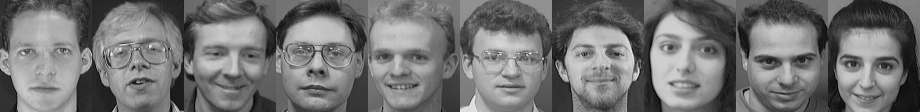

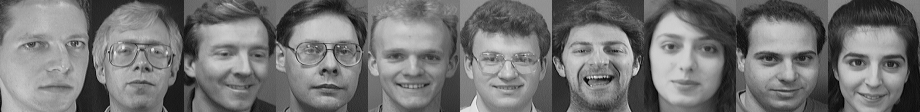

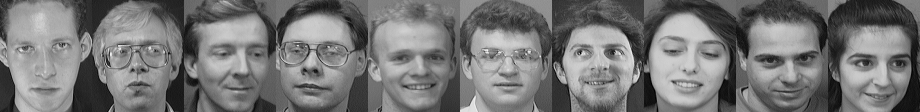

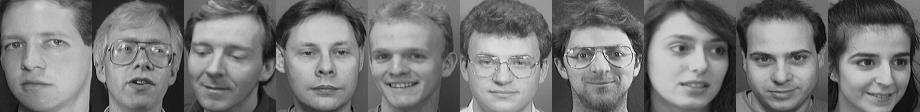

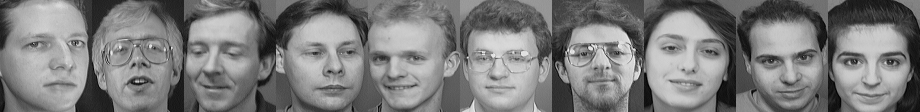

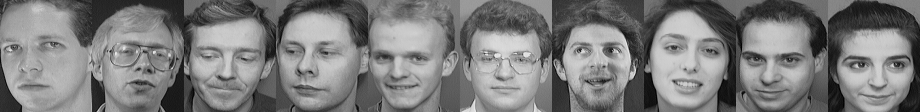

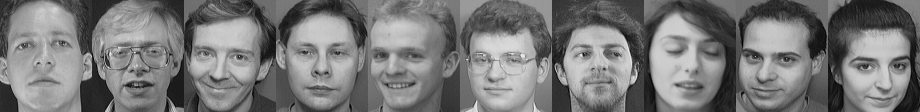

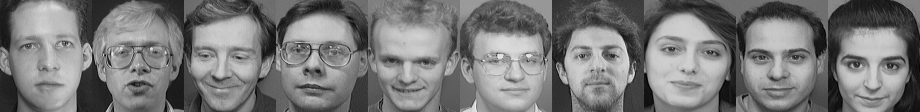

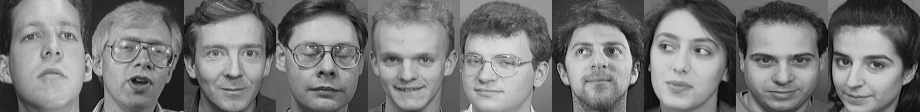

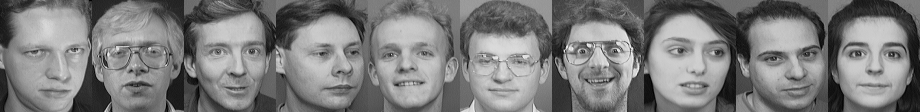

In [117]:
# Displaying some of the subjects
for i in range(10):
    img = PIL.Image.fromarray(np.concatenate((
        D[i].reshape(-1,92),D[i+10].reshape(-1,92),D[i+20].reshape(-1,92),D[i+30].reshape(-1,92),
        D[i+40].reshape(-1,92),D[i+50].reshape(-1,92),D[i+60].reshape(-1,92),D[i+70].reshape(-1,92),
        D[i+80].reshape(-1,92),D[i+90].reshape(-1,92)
        ),axis = 1).reshape(112,-1).astype('uint8'))
    display(img)

In [118]:
# Splitting data
training_data = list()
training_labels = list()
test_data = list()
test_labels = list()
for i in range(400):
  if i%2 == 1:
    training_data.append(D[i])
    training_labels.append(Y[i])
  else :
    test_data.append(D[i])
    test_labels.append(Y[i])
D_train = np.array(training_data)
Y_train = np.array(training_labels)
D_test = np.array(test_data)
Y_test = np.array(test_labels)
print(f'Training data shape : {D_train.shape} || Training data labels shape : {Y_train.shape}')
print(f'Test data shape : {D_test.shape} || Test data labels shape : {Y_test.shape}')

Training data shape : (200, 10304) || Training data labels shape : (200, 1)
Test data shape : (200, 10304) || Test data labels shape : (200, 1)
